<div class="alert alert-info">
<h2> Комментарий ревьюера 3</h2>

Привет. Оформление комментариев по работе сохраняется. Только обозначим, что это третья итерация. 

</div>

<div class="alert alert-info">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-info">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом. Он выполнен уже на достойном уровне. Однако есть моменты, которые еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. Если это неприемлемо, то прошу сообщить. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках:
    
<div class="alert alert-success">Если фон комментария зелёный - всё сделано правильно. Рекомендации укажу таким же цветом;</div>
        
<div class="alert alert-warning">Оранжевый - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки;</div>
        
<div class="alert alert-danger">Красный - нужно переделать. </div>
        
Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. Свои же комментарии ты можешь обозначать любым заметным способом. 

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

# Содержание
1. [Подготовка данных](#0),
2. [Исследование задачи](#1),
    * [Логистическая регрессия](#2),
    * [Дерево решений](#3),
    * [Случайный лес](#4),
3. [Борьба с дисбалансом](#5),
    * [Увеличение выборки](#6),
    * [Уменьшение выборки](#7),
4. [Тестирование модели](#8),


# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Стоит также описать те данные, с которыми мы работаем. 

</div>

# 1. Подготовка данных <a id='0'></a>

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверю столбец Tenure, в котором имеются пропуски.

In [4]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Предположу, что пропуски в столбце количество недвижимости означают отсутствие недвижимости у клиента. Исходя из этого, пропуски заменены на 0.

In [5]:
data['Tenure'] = data['Tenure'].fillna(0)
data['Tenure'] = data['Tenure'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Первый взгляд на таблицу выполнен. Здорово, что ты привел возможную причину появления пропусков в данных.

</div>

Проверю, что всё-таки в нашем датасете все клиенты уникальные.

In [6]:
len(data['CustomerId'].unique())

10000

Датасет состоит из 10000 объектов и 14 признаков, из них для обучения на не понадобятся: RowNumber, CustomerId, Surname. Целевой признак для нашей модели - Exited, т.е. модель, будет предсказывать значение 1 если клиент уйдет и 0 если нет.

In [7]:
del_column = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(del_column, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Действительно, данные параметры для построения моделей нам не понадобятся и их лучше убрать. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Почему ты выбрал именно такие размеры выборок при разбиении? 
    
Scaler лучше вынести из данной функции. Иначе мы имеем сразу 2 действия в одной функции, что не очень хорошо. 

</div>

# 2. Исследование задачи <a id='1'></a>

Исследую баланс классов в тренировочной выборке: посмотрим долю 0 и 1 в целевом признаке

0    0.7963
1    0.2037
Name: Exited, dtype: float64


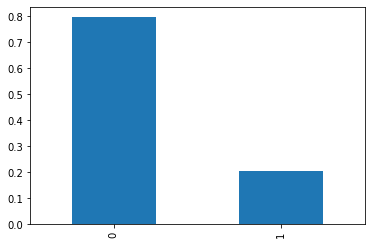

In [8]:
data_frequency = data['Exited'].value_counts(normalize = True)
print(data_frequency)
data_frequency.plot(kind = 'bar')

Соотношение классов далеко от 1:1, т.е. они несбалансированы: ~80% отрицательных и ~20% положительных.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Будем использовать методы балансирования классов для улучшения данной ситуации. 

</div>

In [9]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Категоризация проведена. Здорово, что ты также избежал dummy-ловушку. 

</div>

In [10]:
target = data['Exited']
features = data.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.4, random_state=12345)

In [11]:
# Разделю валидационную на тестовую и валидационную
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size = 0.5, random_state=  12345)

In [12]:
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7479    -0.886751 -0.373192  1.104696  1.232271              1          1   
3411     0.608663 -0.183385  1.104696  0.600563              1          0   
6027     2.052152  0.480939 -0.503694  1.027098              2          0   
1247    -1.457915 -1.417129  0.461340 -1.233163              2          1   
3716     0.130961 -1.132419 -0.825373  1.140475              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7479               0        -0.187705                  0                1   
3411               0        -0.333945                  0                0   
6027               1         1.503095                  1                0   
1247               0        -1.071061                  0                0   
3716               0         1.524268                  1                0   

      Gender_Male  
7479            1  
3411            0  
6027          

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Теперь все выполнено здорово. Ты не просто создал рабочие выборки, но и провел нормировку числовых значений. Теперь мы полностью готовы к обучению моделей. 

</div>

### Логистическая регрессия <a id='2'></a>

In [13]:
pd.options.mode.chained_assignment = None

model = LogisticRegression(solver = 'liblinear', random_state = 12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predict_valid))

F1: 0.4797238999137188


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выборки лучше выделить один раз и работать с уже готовыми. Каждый раз делать этого не стоит.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Смотри, выборки по объему 0 и 1 несколько отличаются. Сделать их доли в разных выборках одинаковыми нам поможет стратификация в методе [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

</div>

При дисбалансе классов логистическая регрессия предсказывает крайне плохо.
Перед тем, как экспериментировать с моделями дерева решений и случайного леса, воспользуемся техникой порядкового кодирования для категориальных признаков.

In [14]:
#encoder = OrdinalEncoder()
#data = pd.DataFrame(encoder.fit_transform(data), columns = data.columns)

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Для чего нам нужна данная операция? Каков ее смысл? Кодирование ты уже провел при помощи OHE. 

</div>

<div class="alert alert-info">
    Немного запутался в этом
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Это была лишняя операция, которая не улучшала нам качества моделей. 

</div>

### Дерево решений <a id='3'></a>

In [15]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
print('f1 =', f1_score(target_valid, predict_valid))

f1 = 0.4788391777509069


Лучший результат модели 0.5359877488514548 с глубиной равной 6.

### Случайный лес <a id='4'></a>

В качестве гиперпараметра глубины дерева возьму значение 10.

In [16]:
model = RandomForestClassifier(random_state = 12345)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
print('f1 =', f1_score(target_valid, predict_valid))

f1 = 0.5138461538461537


In [17]:
# Использую GridSearchCV для поиска оптимальных гиперпараметров
params = [
    {
        'n_estimators': [50, 100, 150],
        'max_leaf_nodes':[50, 100, 150]
    },
    {
        'bootstrap': [False],
        'n_estimators': [50, 100, 150],
    },
]
ran_forest = RandomForestClassifier()
grid_search = GridSearchCV(
    ran_forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [18]:
grid_search.best_params_

{'max_leaf_nodes': 100, 'n_estimators': 100}

In [19]:
#Используем лучшие параметры для модели
model = RandomForestClassifier(
    random_state = 12345,
    n_estimators = 50,
    max_leaf_nodes = 100
)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
print('f1=', f1_score(target_valid, predicted_valid))

f1= 0.49358974358974367


Разделил датасет на тренировочную, валидационную и тестовую выборки.
Проверил работу моделей: тестового дерева, случайных деревьев и логистической регрессии.
Выбрал модель с лучшие показания f1-меры - Модель случайного леса.
Для выбранной модели методом GridSearchCV подобрал параметры.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Для того чтобы не перебирать параметры в циклах существует [поиск по сетке](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Будет здорово, если ты сможешь его применить в своей работе. Код заметно сократится и станет понятнее. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Круто, что ты использовал gridsearch. Это очень важный инструмент, который помогает в подборе гиперпараметров.  

</div>

# 3. Борьба с дисбалансом <a id='5'></a>

### Увеличение выборки <a id='6'></a>

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

features_train_u, target_train_u = upsample(features_train, target_train, 4)
target_train_u.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

<div class="alert alert-danger">
<h2> Комментарий ревьюера</h2>

Суть upsampling'а и downsampling'а в том, чтобы выровнять размеры классов в тренировочной выборке. Соотношение классов мы выяснили ранее, оно равно 4 к 1. Параметр repeat выше и fraction ниже в downsampling следует выбрать соответствующими. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Да, соотношение у нас примерно 4 к 1, так что repeat стоит сделать равным 4.

</div>

#### Случайный лес 

In [21]:
#Проверю модель после upsample
model = RandomForestClassifier(
    random_state = 12345,
    n_estimators = 50,
    max_leaf_nodes = 100
)
model.fit(features_train_u, target_train_u) 
predicted_valid_forest = model.predict(features_valid)
print('f1=', f1_score(target_valid, predicted_valid_forest))

f1= 0.6143141153081512


### Уменьшение выборки <a id='7'></a>

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones]
    )
    
    return features_downsampled, target_downsampled

<div class="alert alert-warning">
<h2> Комментарий ревьюера 2</h2>

Тут также fraction стоило выставить, исходя из соотношения классов. Подбор данного параметра приведет к переобучению модели. 

</div>

In [23]:
#Проверю модель после downsample
model = RandomForestClassifier(
    random_state = 12345,
    n_estimators = 50,
    max_leaf_nodes = 100
)
features_downsampled, target_downsampled = downsample(features_train, target_train, 1)
model.fit(features_downsampled, target_downsampled) 
predicted_valid_forest = model.predict(features_valid)
print('f1=', f1_score(target_valid, predicted_valid_forest))

f1= 0.491283676703645


<div class="alert alert-warning">
<h2> Комментарий ревьюера 3</h2>

fraction стоило поставить в 0,25. Соотношение классов у нас 1 к 4. Уменьшив превалирующий класс в 4 раза, мы бы получили равные размеры классов в выборке. 

</div>

Использовал upsample/downsample для балансировки признаков.
Выбрал upsample, т.к. у него выше показания метрик.

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Стоит сравнивать результаты разных методов между собой. Увеличилось ли качество моделей в данном случае?
    
В логистической регрессии также стоит подбирать гиперпараметры. Не совсем честно на одних моделях их подбирать, а другие использовать по умолчанию. Обрати внимание на имеющиеся у [данной модели](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) параметры.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

ROC-кривые лучше построить на одном рисунке хотя бы в одном из анализов (по upsampling или downsampling). Такой график поможет нам в выборе наилучшей модели. 
    
Все получаемые метрики моделей советую собирать в единую табличку. Она нам сильно пригодится при выборе наилучшей модели. 

</div>

# 4. Тестирование модели <a id='8'></a>

In [24]:
features_train_t, features_test_t, target_train_t, target_test_t = train_test_split(
    features, target, test_size = 0.4, random_state  = 12345)

features_train_u, target_train_u = upsample(features_train_t, target_train_t, 4)
model = RandomForestClassifier(random_state = 12345,
    n_estimators = 50,
    max_leaf_nodes = 100)
model.fit(features_train_u, target_train_u)
predictions_test = model.predict(features_test_t)

print('f1=', f1_score(target_test_t, predictions_test))

f1= 0.6139909411172623


<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Модель перед финальным тестированием стоит обучить на полных данных, т.е. на совместной тренировочной и валидационной выборках. Выделять выборку valid, в данном случае, уже не требуется. Проведи upsampling (если он требуется, ведь наилучшее качество показывает именно данная техника), затем обучи модель и проверь качество модели. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера 2</h2>

Смотри, ты downsampling проводишь лишь на тренировочной выборке. Т.е. в данном разделе ты никак не используешь валидационную выборку. В итоге 20% данных просто лежат и никак не участвуют в процессе. Мы же можем их задействовать в обучении. Не пропадать же добру) Соедини тренировочную и валидационную выборки, проведи downsampling, А затем уже обучи модель. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Да, теперь все сделано правильно, так мы еще немного увеличили f1-score.

</div>

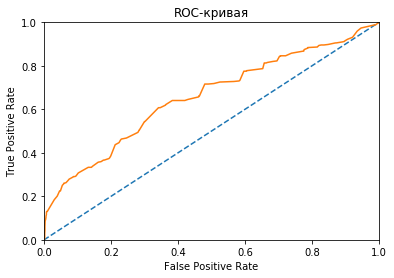

In [25]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Круто, что ты умеешь строить ROC-кривую. Лучше это сделать выше для нескольких моделей. Такой рисунок поможет нам сравнить их между собой. 

</div>

In [26]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6561467969676392


AUC-ROC случайной модели равна 0.5 – наша метрика выше и понемногу стремиться к недостижимой едицине. Модель, обученная с учетом баланса справилась с прогнозами гораздо лучше, чем без его учета, так как получила более сбалансированную выборку и более не склонна всегда отдавать предпочтение отрицательному ответу.

In [27]:
strategies = ['most_frequent', 'stratified', 'uniform', 'prior'] 
for name in strategies:
    dummy_model = DummyClassifier(random_state = 12345, strategy = name)
    dummy_model.fit(features_train, target_train)
    score = dummy_model.score(features_train, target_train)
    predict = dummy_model.predict(features_test)
    f1 = f1_score(target_test, predict)
    print('Для стратегии', name, 'средняя точность =', score, 'f1=', f1)

Для стратегии most_frequent средняя точность = 0.8006666666666666 f1= 0.0
Для стратегии stratified средняя точность = 0.675 f1= 0.1780487804878049
Для стратегии uniform средняя точность = 0.49983333333333335 f1= 0.2911126662001399
Для стратегии prior средняя точность = 0.8006666666666666 f1= 0.0


<div class="alert alert-warning">
<h2> Комментарий ревьюера 2</h2>

Здорово, что ты изучил данную модель. Лучше вывести F1 для базовой модели. Именно относительно данной метрики мы и работаем в проекте.  

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

👍 

</div>

# Вывод

Проверил полученную модель на тестовой выборке. Значение метрики f1 удовлетворяет требованию (выше 0.59). Высокий AUC-ROC и f1 означает, что классификатор в настоящее время выполняет достойную работу.

<div class="alert alert-info">
    Выборки выделил один раз, добавил поиск по сетке.
 </div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 2</h2>

В выводе также стоит описать все совершенные в проекте действия. Так ты подчеркнешь объем проведенной работы. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>
 
Важно проверить работу модели на адекватность в сравнении с простым классификатором. Проверить качество константной модели нам поможет [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Будет здорово, если ты изучишь данную модель. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<div class="alert alert-info">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Советую обратить внимание на метод pairplot. 

Ты проделал большую работу, молодец! Ты овладел важными на данном этапе обучения инструментами, а также довольно качественно их используешь. Критических замечаний немного. Однако их важно исправить. Также есть достаточное число желтых комментариев. Думаю, исправить и их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-info">
<h2> Комментарий ревьюера 2</h2>

Большая часть помарок исправлена, молодец. Осталось немного. Как исправишь помарку при финальном тестировании, присылай работу снова. Буду ждать :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Все помарки исправлены, работа выполнена хорошо. У тебя получился качественный проект, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Успехов в дальнейшем пути :)

</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*